<a href="https://colab.research.google.com/github/EmAchieng/DataSciencePracticeSeries/blob/master/ImageClassification_Convolution_Layer_Ops_Essentials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Understanding CNN Layer Operations

There are typically two major layers in a CNN model:

- Convolutional Layers
- Pooling Layers

![](https://i.imgur.com/JODQsPc.png)

Here we will look at how each of these layers work and implement their operation mechanism from scratch.

<div style="text-align: right"><i><font size="2">Tutorial by: <a href="https://www.linkedin.com/in/dipanzan" target="_parent">Dipanjan (DJ) Sarkar</a></font></i></div>

## Load Dependencies

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [2]:
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

## Load and View Sample Image

In [3]:
!wget -O lion.png https://i.imgur.com/fQXl2Fo.png

--2021-04-15 11:42:38--  https://i.imgur.com/fQXl2Fo.png
Resolving i.imgur.com (i.imgur.com)... 151.101.248.193
Connecting to i.imgur.com (i.imgur.com)|151.101.248.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119033 (116K) [image/png]
Saving to: ‘lion.png’

lion.png            100%[===================>] 116.24K  --.-KB/s    in 0.03s   

2021-04-15 11:42:38 (4.45 MB/s) - ‘lion.png’ saved [119033/119033]



In [4]:
leo = ImageOps.grayscale(Image.open('lion.png'))
leo_arr = np.array(leo)
leo_arr = leo_arr.astype('float32')

In [5]:
leo_arr, leo_arr.shape

(array([[ 30.,  26.,  42., ..., 163., 161., 162.],
        [ 34.,  31.,  55., ..., 162., 161., 162.],
        [ 51.,  58.,  80., ..., 167., 168., 162.],
        ...,
        [ 86.,  67., 106., ...,  96.,  56.,  98.],
        [ 84.,  62., 109., ...,  79.,  48., 102.],
        [ 70.,  90.,  95., ...,  47.,  63., 103.]], dtype=float32), (225, 225))

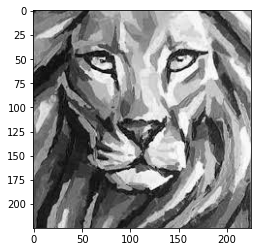

In [6]:
plt.imshow(leo_arr, cmap='gray');

## Implement a Raw Convolution-2D Layer (without Relu Activation)

In [7]:
def conv2d_raw(image_arr, conv_filter):
    # copy image
    image_copy = np.copy(image_arr)
    # get image dims
    size_x, size_y = image_copy.shape

    # for each pixel (x, y) in the image
    for x in range(1,size_x-1):
        for y in range(1,size_y-1):
            # initial convolution ops result = 0
            convolution = 0.0
            # apply convolution on 3x3 patch of image with 3x3 filter \ kernel
            #   Source Image Patch (3x3)           Convolution Filter (3x3)     New Image - position (x,y) 
            # [x-1, y-1] [x, y-1] [x+1, y-1]      [f(0,0)] [f(0,1)] [f(0,2)]
            # [x-1, y  ] [ x, y ] [x+1, y  ]  *   [f(1,0)] [f(1,1)] [f(1,2)]     =    [NI(x, y)]
            # [x-1, y+1] [x, y+1] [x+1, y+1]      [f(2,0)] [f(2,1)] [f(2,2)]
            convolution = convolution + (image_arr[x - 1, y-1] * conv_filter[0][0])
            convolution = convolution + (image_arr[x, y-1] * conv_filter[0][1])
            convolution = convolution + (image_arr[x + 1, y-1] * conv_filter[0][2])

            convolution = convolution + (image_arr[x-1, y] * conv_filter[1][0])
            convolution = convolution + (image_arr[x, y] * conv_filter[1][1])
            convolution = convolution + (image_arr[x+1, y] * conv_filter[1][2])
            
            convolution = convolution + (image_arr[x-1, y+1] * conv_filter[2][0])
            convolution = convolution + (image_arr[x, y+1] * conv_filter[2][1])
            convolution = convolution + (image_arr[x+1, y+1] * conv_filter[2][2])
            filter_wt_sum = np.sum(conv_filter)
            # normalize to make filter weights add up to 1
            weight = 1 if filter_wt_sum == 0 else 1./filter_wt_sum
            
            convolution = convolution * weight
            #print(convolution)
            # clip max \ min pixels
            # assign convolution ops result to new image pixel image_copy(x, y)
            image_copy[x, y] = convolution

    return image_copy

## Implement a Convolution-2D Layer (with Relu Activation)

Non-linear activation will remove any negative feature map values and transform them to 0

In [8]:
def conv2d(image_arr, conv_filter):
    # copy image
    image_copy = np.copy(image_arr)
    # get image dims
    size_x, size_y = image_copy.shape

    # for each pixel (x, y) in the image
    for x in range(1,size_x-1):
        for y in range(1,size_y-1):
            # initial convolution ops result = 0
            convolution = 0.0
            # apply convolution on 3x3 patch of image with 3x3 filter \ kernel
            #   Source Image Patch (3x3)           Convolution Filter (3x3)     New Image - position (x,y) 
            # [x-1, y-1] [x, y-1] [x+1, y-1]      [f(0,0)] [f(0,1)] [f(0,2)]
            # [x-1, y  ] [ x, y ] [x+1, y  ]  *   [f(1,0)] [f(1,1)] [f(1,2)]     =    [NI(x, y)]
            # [x-1, y+1] [x, y+1] [x+1, y+1]      [f(2,0)] [f(2,1)] [f(2,2)]
            convolution = convolution + (image_arr[x - 1, y-1] * conv_filter[0][0])
            convolution = convolution + (image_arr[x, y-1] * conv_filter[0][1])
            convolution = convolution + (image_arr[x + 1, y-1] * conv_filter[0][2])

            convolution = convolution + (image_arr[x-1, y] * conv_filter[1][0])
            convolution = convolution + (image_arr[x, y] * conv_filter[1][1])
            convolution = convolution + (image_arr[x+1, y] * conv_filter[1][2])
            
            convolution = convolution + (image_arr[x-1, y+1] * conv_filter[2][0])
            convolution = convolution + (image_arr[x, y+1] * conv_filter[2][1])
            convolution = convolution + (image_arr[x+1, y+1] * conv_filter[2][2])
            filter_wt_sum = np.sum(conv_filter)
            # normalize to make filter weights add up to 1
            weight = 1 if filter_wt_sum == 0 else 1./filter_wt_sum
            convolution = convolution * weight
            # clip max \ min pixels
            if(convolution<0):
                convolution = 0
            if(convolution>255):
                convolution = 255
            # assign convolution ops result to new image pixel image_copy(x, y)
            image_copy[x, y] = convolution

    return image_copy

## Conv2D operation on source image with different kernels

There are various kernels which we can apply and see the effects as depicted below.

![](https://i.imgur.com/z3dcSlg.png)


## Edge Detection: Outline kernel

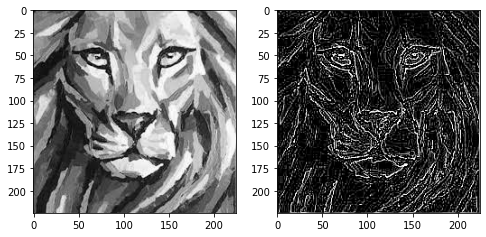

In [9]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[-1, -1, -1], 
                                                  [-1, 8, -1], 
                                                  [-1, -1, -1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr, cmap='gray');
ax[1].imshow(conv_res, cmap='gray');

## Exercise: Visualize a Convolution Operation

## Visualize Outline Filter

In [10]:
conv_filter=[[-1, -1, -1], 
             [-1, 8, -1], 
             [-1, -1, -1]]

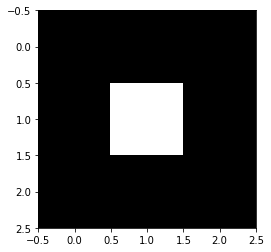

In [11]:
plt.imshow(conv_filter, cmap='gray');

## Look at Image Representation

In [12]:
leo_arr

array([[ 30.,  26.,  42., ..., 163., 161., 162.],
       [ 34.,  31.,  55., ..., 162., 161., 162.],
       [ 51.,  58.,  80., ..., 167., 168., 162.],
       ...,
       [ 86.,  67., 106., ...,  96.,  56.,  98.],
       [ 84.,  62., 109., ...,  79.,  48., 102.],
       [ 70.,  90.,  95., ...,  47.,  63., 103.]], dtype=float32)

## Extract Input Image Patch

In [13]:
leo_arr[0:6 :,0:6]

array([[ 30.,  26.,  42.,  80., 105., 103.],
       [ 34.,  31.,  55., 102., 121., 106.],
       [ 51.,  58.,  80., 106., 116., 112.],
       [ 64.,  93., 111., 106., 106., 123.],
       [ 72., 109., 131., 121., 115., 128.],
       [ 97., 113., 126., 125., 118., 116.]], dtype=float32)

## Visualize Input Image Patch

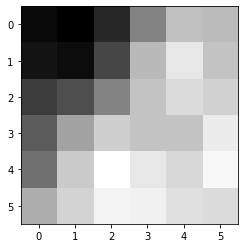

In [14]:
plt.imshow(leo_arr[0:6 :,0:6], cmap='gray');

## Compute and Visualize Convolved Feature Map (raw)

In [15]:
rfm = conv2d_raw(leo_arr[0:6 :,0:6], conv_filter=[[-1, -1, -1], 
                                                 [-1, 8, -1], 
                                                [-1, -1, -1]])

In [16]:
rfm[1:5:,1:5]

array([[-128.,  -85.,  111.,  138.],
       [ -55.,  -22.,   51.,   46.],
       [  68.,   84.,  -38.,  -79.],
       [  65.,  144.,   30.,  -23.]], dtype=float32)

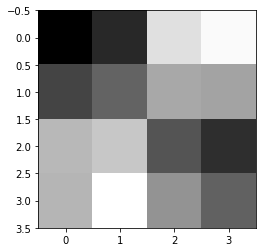

In [17]:
plt.imshow(rfm[1:5:,1:5], cmap='gray');

## Compute and Visualize Convolved and Activated Feature Map

In [18]:
afm = conv2d(leo_arr[0:6 :,0:6], conv_filter=[[-1, -1, -1], 
                                            [-1, 8, -1], 
                                            [-1, -1, -1]])

In [19]:
afm[1:5:,1:5]

array([[  0.,   0., 111., 138.],
       [  0.,   0.,  51.,  46.],
       [ 68.,  84.,   0.,   0.],
       [ 65., 144.,  30.,   0.]], dtype=float32)

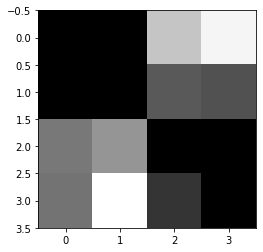

In [20]:
plt.imshow(afm[1:5:,1:5], cmap='gray');

## Implement a Maxpooling-2D Layer

In [21]:
def maxpooling2d(image_arr):
    # get image dims
    size_x, size_y = image_arr.shape
    # generate new image
    new_size_x, new_size_y = size_x // 2, size_y // 2
    image_new = np.zeros((new_size_x, new_size_y))
    # for each pixel (x, y) in the image with interval of 2
    for x in range(0, size_x-1, 2):
        for y in range(0, size_y-1, 2):
            # initial pixel values = []
            pixels = []
            # apply max pool on 2x2 patch of image 
            #  Image Patch (2x2)              
            # [ x, y ] [x+1, y  ]    
            # [x, y+1] [x+1, y+1]      
            pixels.append(image_arr[x, y])
            pixels.append(image_arr[x+1, y])

            pixels.append(image_arr[x, y+1])
            pixels.append(image_arr[x+1, y+1])
            # take max of pixels to assign to new image pixel image_new(x, y)
            image_new[x//2, y//2] = max(pixels)

    return image_new

## Maxpooling2D Example

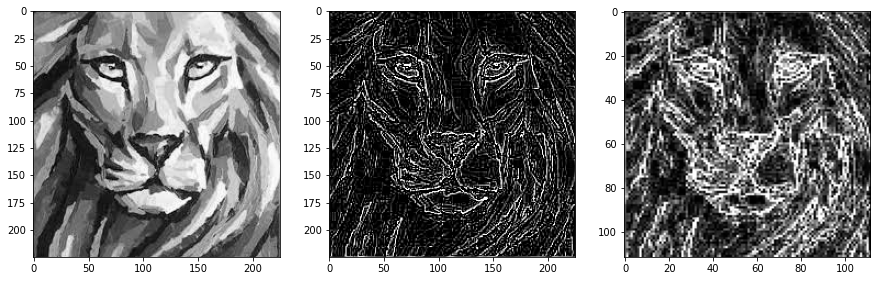

In [22]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[-1, -1, -1], 
                                                  [-1, 8, -1], 
                                                  [-1, -1, -1]])
pool_res = maxpooling2d(conv_res)
f, ax = plt.subplots(1,3, figsize=(15, 15))
ax[0].imshow(leo_arr, cmap='gray');
ax[1].imshow(conv_res, cmap='gray');
ax[2].imshow(pool_res, cmap='gray');

## Exercise: Visualize a Maxpooling operation

## Visualize Activated Feature Map Patch

In [23]:
afm[1:5:, 1:5]

array([[  0.,   0., 111., 138.],
       [  0.,   0.,  51.,  46.],
       [ 68.,  84.,   0.,   0.],
       [ 65., 144.,  30.,   0.]], dtype=float32)

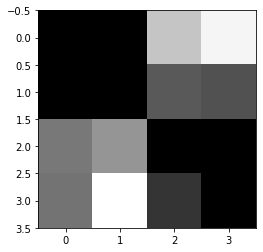

In [24]:
plt.imshow(afm[1:5:,1:5], cmap='gray');

## Maxpooling 2D output on Activated Feature Map Patch

In [25]:
m = maxpooling2d(afm[1:5:,1:5])
m

array([[  0., 138.],
       [144.,  30.]])

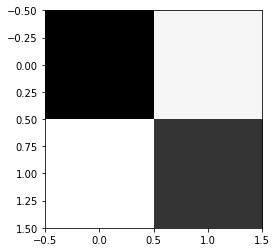

In [26]:
plt.imshow(m, cmap='gray');

## Exercise: Try out a few filters for convolution and pooling

## Outline filter

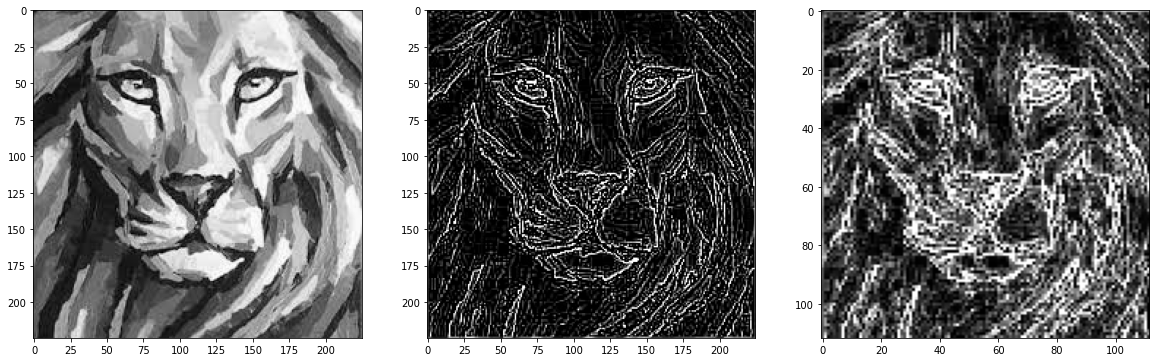

In [27]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[-1, -1, -1], 
                                                  [-1, 8, -1], 
                                                  [-1, -1, -1]])
pool_res = maxpooling2d(conv_res)
f, ax = plt.subplots(1,3, figsize=(20, 10))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);
ax[2].imshow(pool_res);

## Gaussian Blur Filter

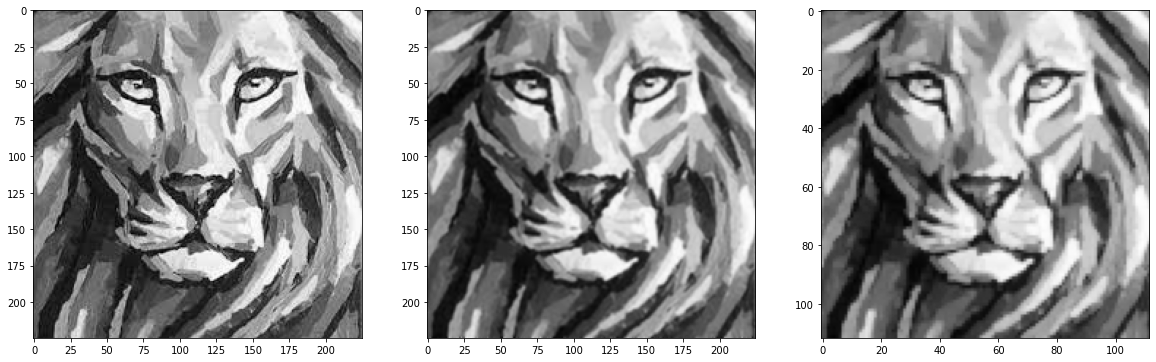

In [28]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=np.array([[1, 2, 1], 
                                                           [2, 4, 2], 
                                                           [1, 2, 1]])/16.)
pool_res = maxpooling2d(conv_res)
f, ax = plt.subplots(1,3, figsize=(20, 10))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);
ax[2].imshow(pool_res);

## Sharpen Filter

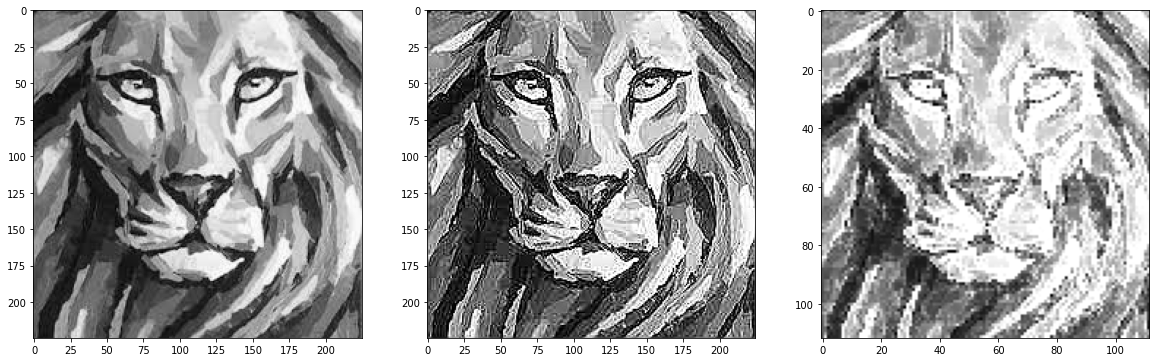

In [29]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[0, -1, 0], 
                                                  [-1, 5, -1], 
                                                  [0, -1, 0]])
pool_res = maxpooling2d(conv_res)
f, ax = plt.subplots(1,3, figsize=(20, 10))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);
ax[2].imshow(pool_res);

## Emboss Filter

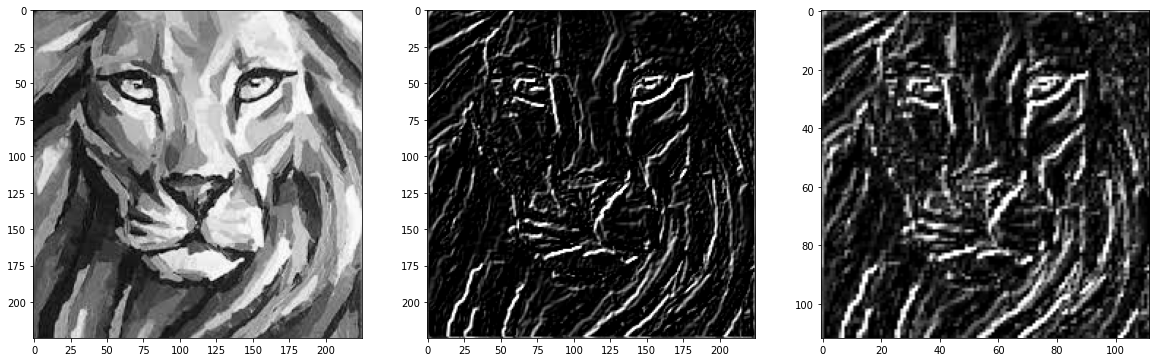

In [30]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[-1, -1, 0], 
                                                  [-1, 0, 1], 
                                                  [0, 1, 1]])
pool_res = maxpooling2d(conv_res)
f, ax = plt.subplots(1,3, figsize=(20, 10))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);
ax[2].imshow(pool_res);